In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sb

In [41]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [42]:
df = pd.read_csv('Motion_wellbeing_consolidated.csv', encoding='unicode-escape')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 360 rows and 11 columns


In [43]:
df.head()

,Unnamed: 0,Participant ID,Week,Game,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social
0,0,1,week1,Arctic Punch,13.25,6.23,286,2.0,12.0,19.0,18.0
1,1,1,week2,Arctic Punch,18.16,11.61,297,2.0,12.0,16.0,17.0
2,2,1,week3,Arctic Punch,16.48,22.25,371,2.0,11.0,19.0,13.0
3,3,1,week4,Arctic Punch,21.62,10.47,258,2.0,10.0,22.0,17.0
4,4,1,week1,Fruit Ninja,17.70,4.64,94,2.0,12.0,19.0,18.0


### Treating missing/invalid values

In [44]:
# Find rows with 0 or NA values
missing_rows = df[(df.isna().any(axis=1)) | ((df[df.columns] == 0).any(axis=1))]

missing_rows

,Unnamed: 0,Participant ID,Week,Game,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social
0,0,1,week1,Arctic Punch,13.25,6.23,286,2.0,12.0,19.0,18.0
217,217,19,week2,Arctic Punch,NaN,0.00,0,2.0,13.0,22.0,22.0
218,218,19,week3,Arctic Punch,NaN,0.00,0,NaN,NaN,NaN,NaN
219,219,19,week4,Arctic Punch,NaN,0.00,0,NaN,NaN,NaN,NaN
221,221,19,week2,Fruit Ninja,NaN,0.00,0,2.0,13.0,22.0,22.0
222,222,19,week3,Fruit Ninja,NaN,0.00,0,NaN,NaN,NaN,NaN
223,223,19,week4,Fruit Ninja,NaN,0.00,0,NaN,NaN,NaN,NaN
225,225,19,week2,Piano Step,NaN,0.00,0,2.0,13.0,22.0,22.0
226,226,19,week3,Piano Step,NaN,0.00,0,NaN,NaN,NaN,NaN
227,227,19,week4,Piano Step,NaN,0.00,0,NaN,NaN,NaN,NaN


It appears that only participant 19,20,24,27 having zero or missing motion/wellbeing data. Since the data do not provide insight, we remove them.

In [45]:
df = df.drop(df.index[(df.isna().any(axis=1)) | ((df[df.columns] == 0).any(axis=1))])
missing_rows = df[(df.isna().any(axis=1)) | ((df[df.columns] == 0).any(axis=1))]
missing_rows

,Unnamed: 0,Participant ID,Week,Game,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social


### Treating outliers

As outliers will affect the overall model accuracy, we will have to dive in and see why there are outliers, and should we remove them.

In [46]:
df.dtypes

Unnamed: 0               int64
Participant ID           int64
Week                    object
Game                    object
Max Acceleration       float64
Calories Burnt         float64
Action Count             int64
Companion condition    float64
Emotion                float64
Psychological          float64
Social                 float64
dtype: object

In [47]:
# To view the statistical summary
df.describe().apply(lambda x: x.round(2))

,Unnamed: 0,Participant ID,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social
count,333.00,333.00,333.00,333.00,333.00,333.00,333.00,333.00,333.00
mean,172.99,14.96,18.66,21.30,245.15,1.68,14.01,27.09,22.55
std,103.90,8.66,4.63,28.19,175.82,0.47,3.01,5.19,4.22
min,1.00,1.00,5.30,0.08,20.00,1.00,7.00,16.00,13.00
25%,84.00,8.00,15.50,6.83,141.00,1.00,12.00,24.00,19.00
50%,167.00,14.00,18.41,14.54,222.00,2.00,14.00,27.00,23.00
75%,261.00,22.00,22.29,24.84,302.00,2.00,17.00,31.00,26.00
max,359.00,30.00,27.71,281.12,2054.00,2.00,18.00,36.00,30.00


First, we visualize those outliers in motion data: calories burned, max acceleration and action count

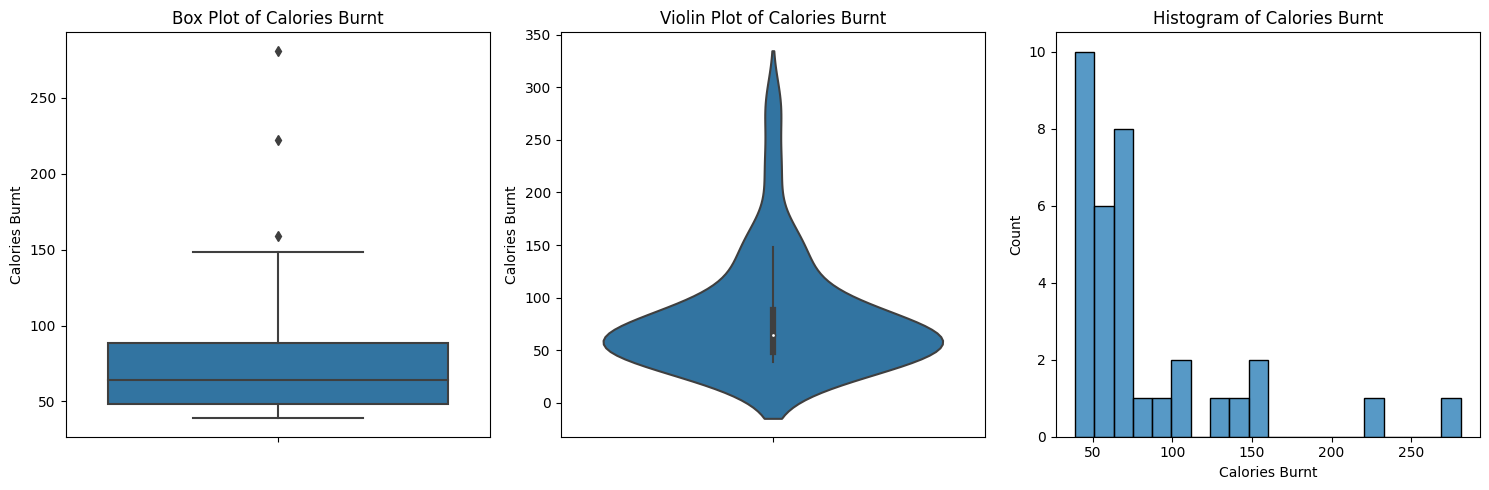

In [49]:
# Create a figure with three axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot a boxplot
sb.boxplot(data=calorie_burnt_outliers, y='Calories Burnt', ax=axes[0])
axes[0].set_title('Box Plot of Calories Burnt')

# Plot a violin plot
sb.violinplot(data=calorie_burnt_outliers, y='Calories Burnt', ax=axes[1])
axes[1].set_title('Violin Plot of Calories Burnt')

# Plot a histogram (histplot)
sb.histplot(data=calorie_burnt_outliers, x='Calories Burnt', ax=axes[2], bins=20)
axes[2].set_title('Histogram of Calories Burnt')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [50]:
# Upper outlier for calories burnt feature
calorie_burnt_upper = df[(df['Calories Burnt'] > np.quantile(df['Calories Burnt'], 0.9))]
games_upper = calorie_burnt_upper['Game'].value_counts()
print('Count of Games with calories burned above the 90th percentile: \n{}'.format(games_upper))

Count of Games with calories burned above the 90th percentile: 
Game
Piano Step      18
Arctic Punch    13
Fruit Ninja      3
Name: count, dtype: int64


In [51]:
# Lower outlier for calories burnt feature
calorie_burnt_lower = df[(df['Calories Burnt'] < np.quantile(df['Calories Burnt'], 0.1))]
games_lower = calorie_burnt_lower['Game'].value_counts()
print('Count of Games with calories burned below the 10th percentile: \n{}'.format(games_lower))

Count of Games with calories burned below the 10th percentile: 
Game
Fruit Ninja     24
Arctic Punch     8
Piano Step       2
Name: count, dtype: int64


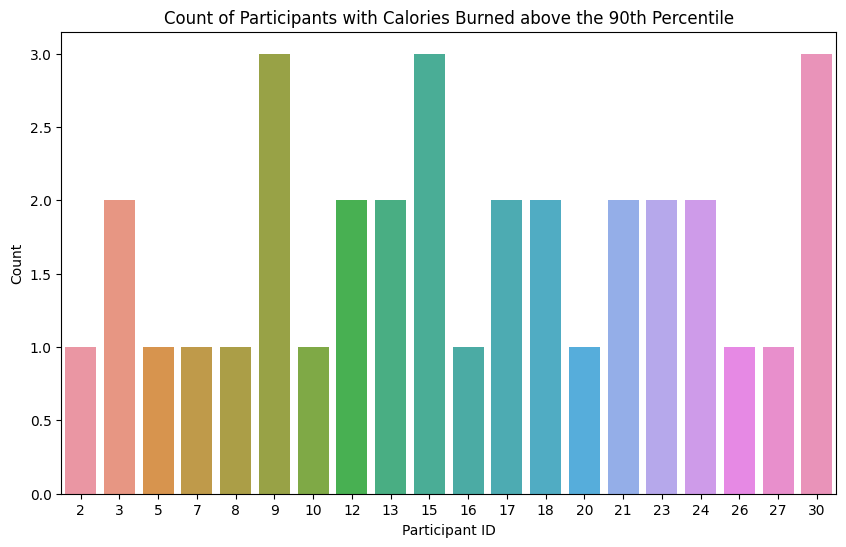

In [52]:
# Create a count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sb.countplot(data=calorie_burnt_outliers, x='Participant ID')
plt.title('Count of Participants with Calories Burned above the 90th Percentile')
plt.xlabel('Participant ID')
plt.ylabel('Count')

# Show the plot
plt.show()

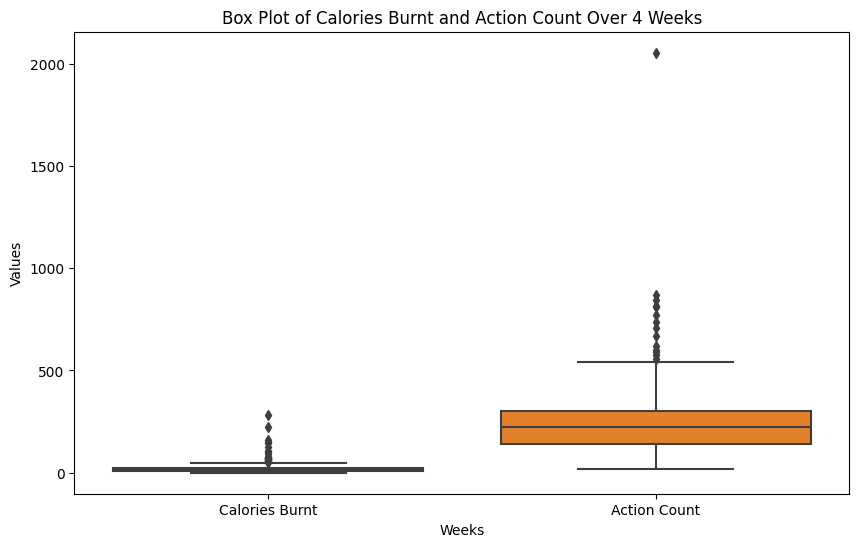

In [53]:
# Box Plot
plt.figure(figsize=(10, 6))
sb.boxplot(data=df[['Calories Burnt', 'Action Count']])
plt.title('Box Plot of Calories Burnt and Action Count Over 4 Weeks')
plt.xlabel('Weeks')
plt.ylabel('Values')
plt.show()